# 图像特效-Swirl滤镜

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [7]:
def swirl_filter(src,cenX,cenY,degree):
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    rows,cols = srcf.shape[0],srcf.shape[1]
    degree = min(degree,360)
    degree = max(0,degree)
    degree = degree / 3600.0
    radius = 0
    
    for y in range(rows):
        for x in range(cols):
            offsetX = x - cenX
            offsetY = y - cenY
            radian = math.atan2(offsetY,offsetX)
            radius = np.sqrt(offsetX ** 2 + offsetY ** 2)
            newX = int(radius * np.cos(radian + degree * radius) + cenX)
            newY = int(radius * np.sin(radian + degree * radius) + cenY)
            newX = min(cols - 1,max(0,newX))
            newY = min(rows - 1,max(0,newY))
            dst[y,x] = src[newY,newX]
            
    return np.uint8(dst)
    

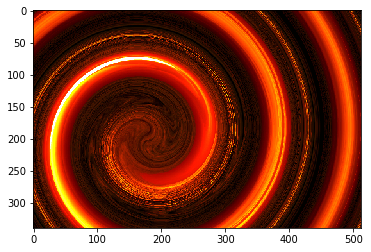

In [9]:
dst = swirl_filter(rgb,180,200,200)
plt.imshow(dst)